<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2021-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos como aplicar distintas técnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de conjuntos de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Reducción de dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>

**Importante:** Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.
   
Para ello vamos a necesitar las siguientes librerías:

In [259]:
from six import StringIO

from IPython.display import Image 
from sklearn import datasets
from sklearn.decomposition import PCA, NMF
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree
from IPython.display import display, Image
import pydotplus
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)

# 1. Carga del conjunto de datos (1 punto)

En primer lugar, deberéis cargar el conjunto de datos Breast Cancer Wisconsin (más información en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Éste se puede descargar de Internet o puede ser cargado directamente usando una librería de "scikit-learn", que incorpora un conjunto de datasets muy conocidos y empleados para minería de datos y machine learning (https://scikit-learn.org/stable/datasets.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> cargad el conjunto de datos "Breast Cancer Wisconsin" y mostrad:
   <br> - El número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "Diagnosis")
    <br> - El número de filas obtenidas
    <br> - Verificad si hay o no datos que faltan ("missing values") y en qué columnas
<hr>
Sugerencia: si usáis sklearn (sklearn.datasets.load_breast_cancer), explorad las diferentes keys del objeto obtenido.

Sugerencia: quizá os resulta útil pasar los datos (atributos + target) a un dataframe de pandas.
</div>

## 1.1 Carga del conjunto de datos

En esta primera parte vamos a realizar la carga del conjuntos de datos. Además, exploraremos las keys del objeto obtenido con sklearn.datasets.load_breast_cancer, y lo convertiremos a un dataframe.

In [209]:
data = datasets.load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

A modo resumen, las claves importantes son:
- data: contiene todos los atributos sin incluir a la variable objetivo.
- target: hace referencia a la variable objetivo.
- target_names: valores de clasificación de la variable objetivo.
- feature_names: nombre de los atributos sin contar la variable objetivo.
- DESCR: descripción del dataset.

Creamos el dataframe con la ayuda de pandas, para ello incluimos todas las variables y luego la objetivo.

In [210]:
df_cancer = pd.DataFrame(data = data.data, columns = data.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Puesto que el dataset original de la web posee únicamente 10 variables que se corresponden con las mean (mean radius, mean texture...), vamos a eliminar del dataset tanto las variables error como las worst. Y posteriormente, añadiremos la variable target.

In [211]:
feature_names = data.feature_names[0:10] # Nos quedamos solamente con las variables mean

df_cancer = df_cancer[feature_names]
df_cancer["target"] = data.target
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


## 1.2 Número y nombre de los atributos

Para saber el número y nombre de atributos observamos la data del dataframe generado.

In [212]:
print("\n-------------------------------------------------" +
      "\nNúmero de atributos sin la variable objetivo" +
     "\n-------------------------------------------------" +
     "\n")
print(str(len(df_cancer.columns) - 1) + " atributos")

print("\n\n-------------------------------------------------" +
      "\nNombre de los atributos sin la variable objetivo" +
     "\n-------------------------------------------------" +
     "\n")
for i in range(len(df_cancer.columns) - 1): # Menos 1 para que no tenga en cuenta la variable target
    print(str(i + 1) + 
          " --> " + 
          df_cancer.columns[i])


-------------------------------------------------
Número de atributos sin la variable objetivo
-------------------------------------------------

10 atributos


-------------------------------------------------
Nombre de los atributos sin la variable objetivo
-------------------------------------------------

1 --> mean radius
2 --> mean texture
3 --> mean perimeter
4 --> mean area
5 --> mean smoothness
6 --> mean compactness
7 --> mean concavity
8 --> mean concave points
9 --> mean symmetry
10 --> mean fractal dimension


Como podemos apreciar en este dataset sobre el cáncer de mama tenemos 10 variables para dictaminar si el tumor es benigno o maligno.

Algunas de estas variables son la media del radio del tumor, su textura, su área, su simetría...

## 1.3 Número de filas obtenidas

In [213]:
print("\n-------------------------------------------------" +
      "\nNúmero de filas obtenidas" +
     "\n-------------------------------------------------" +
     "\n")
print(str(len(df_cancer)) + " filas")


-------------------------------------------------
Número de filas obtenidas
-------------------------------------------------

569 filas


De la anterior ejecución observamos que tenemos 569 filas, es decir, 569 registros con 11 datos en él (datos sobre el tumor + la variable objetivo)

## 1.4 Missing values

Para saber si hay valores perdidos podemos hacer uso de la función info() de pandas, ya que nos indica si hay datos o no. También se podría hacer uso de las funciones isnull() o notnull(), pero la información que obtendríamos sería parecida y menos legible.

In [214]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean perimeter          569 non-null    float64
 3   mean area               569 non-null    float64
 4   mean smoothness         569 non-null    float64
 5   mean compactness        569 non-null    float64
 6   mean concavity          569 non-null    float64
 7   mean concave points     569 non-null    float64
 8   mean symmetry           569 non-null    float64
 9   mean fractal dimension  569 non-null    float64
 10  target                  569 non-null    int32  
dtypes: float64(10), int32(1)
memory usage: 46.8 KB


Como podemos apreciar en la anterior ejecución, no hay valores nulos dentro de nuestro dataset para ninguna de las columnas. Además, para asegurarnos vemos que en todas ellas aparece el número 569 que se corresponde con el número de registros del dataset.

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico:
    <br> - Ilustrad gráficamente la frecuencia de aparición de las variables categóricas, indicando el número.
    <br> - Calculad para cada atributo numérico del conjunto de datos, su valor medio y desviación estándard. 
<hr>
Sugerencia: podeis usar la librería 'pandas' y sus funciones 'describe' y 'value_counts'
</div>

Como variable categórica solamente podemos considerar la variable objetivo, es decir, la variable "target", ya que ésta nos indica si el tumor es benigno o maligno, siendo 0 maligno y siendo 1 benigno.

Antes que nada vamos a crear una nueva variable en la que aparezca un M si es maligno o un B si es benigno.

In [215]:
df_cancer_disc = df_cancer

df_cancer_disc.loc[df_cancer_disc["target"] == 0, "diagnosis"] = "M"
df_cancer_disc.loc[df_cancer_disc["target"] == 1, "diagnosis"] = "B"

df_cancer_disc[["target", "diagnosis"]].head()

,target,diagnosis
0,0,M
1,0,M
2,0,M
3,0,M
4,0,M


Una vez que tenemos la información como queremos creamos el histograma de la variable diagnosis.

<AxesSubplot:>

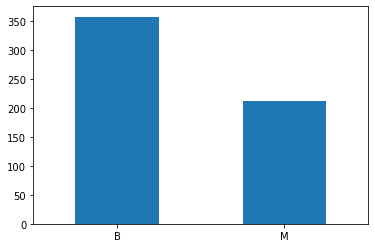

In [216]:
df_cancer_disc["diagnosis"].value_counts().plot.bar(rot = 0)

In [217]:
df_cancer_disc["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Como primer análisis podemos apreciar que hay más casos en los que el tumor es benigno que en el caso contario, para ser más exactos, en el dataset original hay 357 casos benigno y 212 casos en los que el tumor es maligno, es decir, estaríamos hablando de un cáncer de mama.

Por otro lado, vamos a calcular para cada atributo numérico (todos menos la variable objetivo) su media aritmética y su desviación estándar.

In [218]:
df_cancer_disc[feature_names].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


A la vista de la ejecución anterior, podemos ver que a medida que aumenta el rango numérico de una variable su desviación estándar y su media también lo hacen. Cabe destacar, que no tenemos un gran conocimiento del problema, es decir, no sabemos a priori si tener un mayor radio de tumor significa algo maligno, o por el contrario algo benigno.

Algo curioso es ver el cómo es la desviación del área ya que es muy elevada, es decir, hay una elevada dispersión dentro de los datos numéricos, esto puede llegar a ser lógico porque el rango numérico de dicha variable es elevado, sin embargo, la desviación es más de la mitad respecto de la media, ésto nos puede hacer intuir que este atributo puede ser muy significativo a la hora de dictaminar si hay cáncer o no.

Esta ejecución nos puede llegar a ofrecer información si comparamos los valores medios y su desviación con casos reales, ya que de esta forma podremos identificar a priori un patrón de si el tumor es benigno o no. Es por ello que en el siguiente punto realizamos el análisis de éstos junto con un resumen de este apartado.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

In [219]:
df_cancer_disc[df_cancer_disc["diagnosis"] == "M"].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0,M


In [220]:
df_cancer_disc[df_cancer_disc["diagnosis"] == "B"].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target,diagnosis
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,1,B
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,1,B
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,1,B
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,1,B
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,1,B


Obteniendo una pequeña muestra de los casos en los que el tumor es maligno o es benigno, podemos hacernos una idea de qué suele determinar si es cáncer o no.

Respecto al radio, vemos que si dicho valor está por encima de la media (14) suele ser un indicio de que estamos en una situación de cáncer.

En cuanto a la textura del tumor, la media se encuentra en 19, y si observamos de nuevo a mayor valor en dicho atributo más riesgo de cáncer. Aunque no significa que tener un valor muy pequeño no sea un tumor maligno.

El perímetro del tumor paracer ser muy significativo para determinar la tipología del tumor, observamos que los tumores malignos tienen un elevado valor en dicho atributo, muy por encima de la media (91).

Otro de los atributos significativos es el área del tumor, éste sigue la misma tendencia, es decir, a mayor valor más riesgo de padecer cáncer de mama. Tal y como hemos mencionado en este punto la media es de 654, y por norma general los tumores malignos tienen un gran valor respecto a la media.

En cuanto al resto de atributos siguen la tendencia general, cuanto mayor sea el valor del atributo más riesgo de padecer cáncer.

Como recordatorio hay que mencionar que hay más casos de tumores benignos (357) respecto a tumores malignos (212).

## 2.2 Análisis exploratorio de los datos

En este ejercicio vamos a explorar la relación de algunos de los atributos numéricos con la variable respuesta ("Diagnosis"), tanto gráficamente como cuantitativamente y analizaremos las distintas correlaciones. Para empezar, seleccionad los 4 atributos que queréis explorar. Si habéis usado los nombres de columnas proporcionados por sklearn, una lista de posibles nombres de atributos serían:

In [221]:
feats_to_explore = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> utilizando una librería gráfica, como por ejemplo "matplotlib", realizad un gráfico del histograma de valores para cada uno de los atributos seleccionados, separados por los valores de clase de la respuesta ("Diagnosis"). 
    
 La finalidad es observar como se distribuye cada uno de los atributos en función del valor de clase que toman, para poder identificar de forma visual y rápida si algunos atributos permiten diferenciar de forma clara los diferentes diagnósticos de los tumores.
<hr>
Sugerencia: podéis usar el parámetro "alpha" en los gráficos para que se aprecien los tres histogramas.
</div>

Text(0.5, 1.0, 'Media del radio benignos vs media del radio malignos')

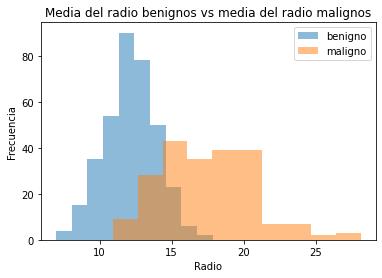

In [222]:
df_benigno = df_cancer_disc[df_cancer_disc["diagnosis"] == "B"] 
df_maligno = df_cancer_disc[df_cancer_disc["diagnosis"] == "M"] 

# Gráfico media del radio
plt.hist(df_benigno["mean radius"], bins=10, alpha=0.5)
plt.hist(df_maligno["mean radius"], bins=10, alpha=0.5)
plt.xlabel("Radio")
plt.ylabel("Frecuencia")
plt.legend(["benigno", "maligno"])
plt.title("Media del radio benignos vs media del radio malignos")

Text(0.5, 1.0, 'Media de la tesxtura benignos vs media de la textura malignos')

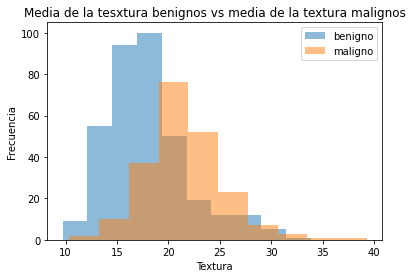

In [223]:
# Gráfico media de la textura
plt.hist(df_benigno["mean texture"], bins=10, alpha=0.5)
plt.hist(df_maligno["mean texture"], bins=10, alpha=0.5)
plt.xlabel("Textura")
plt.ylabel("Frecuencia")
plt.legend(["benigno", "maligno"])
plt.title("Media de la tesxtura benignos vs media de la textura malignos")

Text(0.5, 1.0, 'Media de la suavidad benignos vs media de la suavidad malignos')

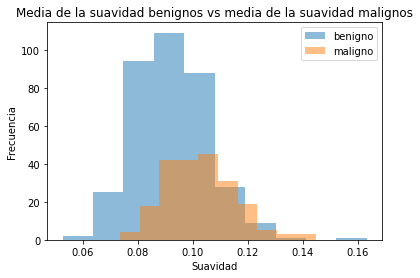

In [224]:
# Gráfico media de la suavidad
plt.hist(df_benigno["mean smoothness"], bins=10, alpha=0.5)
plt.hist(df_maligno["mean smoothness"], bins=10, alpha=0.5)
plt.xlabel("Suavidad")
plt.ylabel("Frecuencia")
plt.legend(["benigno", "maligno"])
plt.title("Media de la suavidad benignos vs media de la suavidad malignos")

Text(0.5, 1.0, 'Media de la simetría benignos vs media de la simetría malignos')

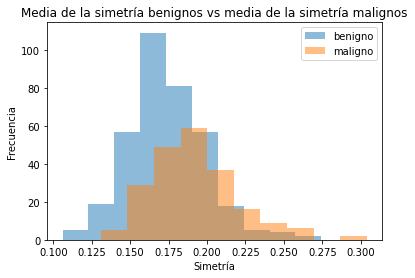

In [225]:
# Gráfico media de la simetría
plt.hist(df_benigno["mean symmetry"], bins=10, alpha=0.5)
plt.hist(df_maligno["mean symmetry"], bins=10, alpha=0.5)
plt.xlabel("Simetría")
plt.ylabel("Frecuencia")
plt.legend(["benigno", "maligno"])
plt.title("Media de la simetría benignos vs media de la simetría malignos")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando los gráficos, ¿qué atributos te parece que tienen valores claramente diferentes para diagnósticos benignos y malignos? ¿Qué atributos no?</div>

Los atributos que considero diferenciadores para determinar si el diagnóstico es benigno o no son:
- La media del radio (mean radius).
- La media de la textura (mean texture).

Considero que ambos atributos son diferenciadores para dictaminar el tipo de cáncer ya que como podemos apreciar el histograma es diferente, en el sentido de que a medida que aumenta el valor de dichos atributos, se produce un mayor riesgo de que el tumor sea maligno. En otras palabras, el histograma está desplazado, es decir, hay una diferencia clara entre valores pequeños asociados a un tumor benigno y valores grandes asociados a un tumor maligno.

Por otro lado, tanto la media de la suavidad (mean smoothness) y la media de la simetría (mean symmetry) las considero que no son significativas, es verdad que hay más casos en los que el tumor es benigno respecto a maligno, y es por ello que tenemos más frecuencia de los casos benignos, pero vemos que a medida que aumenta el valor en dichas variable no significa que el tumor sea maligno.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada uno de los atributos representados en el ejercicio anterior, mostrad la media y la desviación estándard para cada valor de clase de la respuesta. 
    
La finalidad es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
</div>

In [226]:
df_benigno_describe = df_benigno.describe()
df_maligno_describe = df_maligno.describe()

for i in feats_to_explore:
    print("\n------------------------------------------------------------------" + 
         "\n\t\t\t  " + i +
         "\n------------------------------------------------------------------")
    print("\n\t\tBenignos\t | \tMalignos ")
    print("\nMedia:    \t" +
         str(round(df_benigno_describe.loc["mean", i], 2)) + 
         "\t\t\t" +
         str(round(df_maligno_describe.loc["mean", i], 2)))
    print("\nDesviación:\t" +
         str(round(df_benigno_describe.loc["std", i], 2)) + 
         "\t\t\t" +
         str(round(df_maligno_describe.loc["std", i], 2)))


------------------------------------------------------------------
			  mean radius
------------------------------------------------------------------

		Benignos	 | 	Malignos 

Media:    	12.15			17.46

Desviación:	1.78			3.2

------------------------------------------------------------------
			  mean texture
------------------------------------------------------------------

		Benignos	 | 	Malignos 

Media:    	17.91			21.6

Desviación:	4.0			3.78

------------------------------------------------------------------
			  mean smoothness
------------------------------------------------------------------

		Benignos	 | 	Malignos 

Media:    	0.09			0.1

Desviación:	0.01			0.01

------------------------------------------------------------------
			  mean symmetry
------------------------------------------------------------------

		Benignos	 | 	Malignos 

Media:    	0.17			0.19

Desviación:	0.02			0.03


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando a los valores medios y desviaciones estándard calculadas, ¿te parecen significativas las diferencias para diagnósticos benignos y malignos?</div>

Observando los datos calculados podemos seguir manteniendo la información que obtuvimos en el ejercicio anterior, es decir, vemos que tanto el radio como la textura del tumor son significativos, ya que la media correspondiente entre los casos benignos y los casos malignos es significativamente mayor, esto significa que valores pequeños en dichos atributos lo asociamos a un tumor benigno, mientras que valores altos se correspondería con un tumor maligno.

Por otro lado, tanto la suavidad y simetría del motor no son tan significativas, ya que ambos tienen una media similar, es decir, con estos atributos es difícil saber si el tumor es benigno o no.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre todas las variables del conjunto de datos.
</div>

In [227]:
df_corr = df_cancer.iloc[:, 0:10]
df_corr = df_corr.corr()
df_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> representad gráficamente las relaciones entre todas las parejas de las variables "mean" del conjunto de datos.

La finalidad de este ejercicio es poder observar y analizar las correlaciones de manera gráfica entre algunas de las variables.
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn'.
</div>

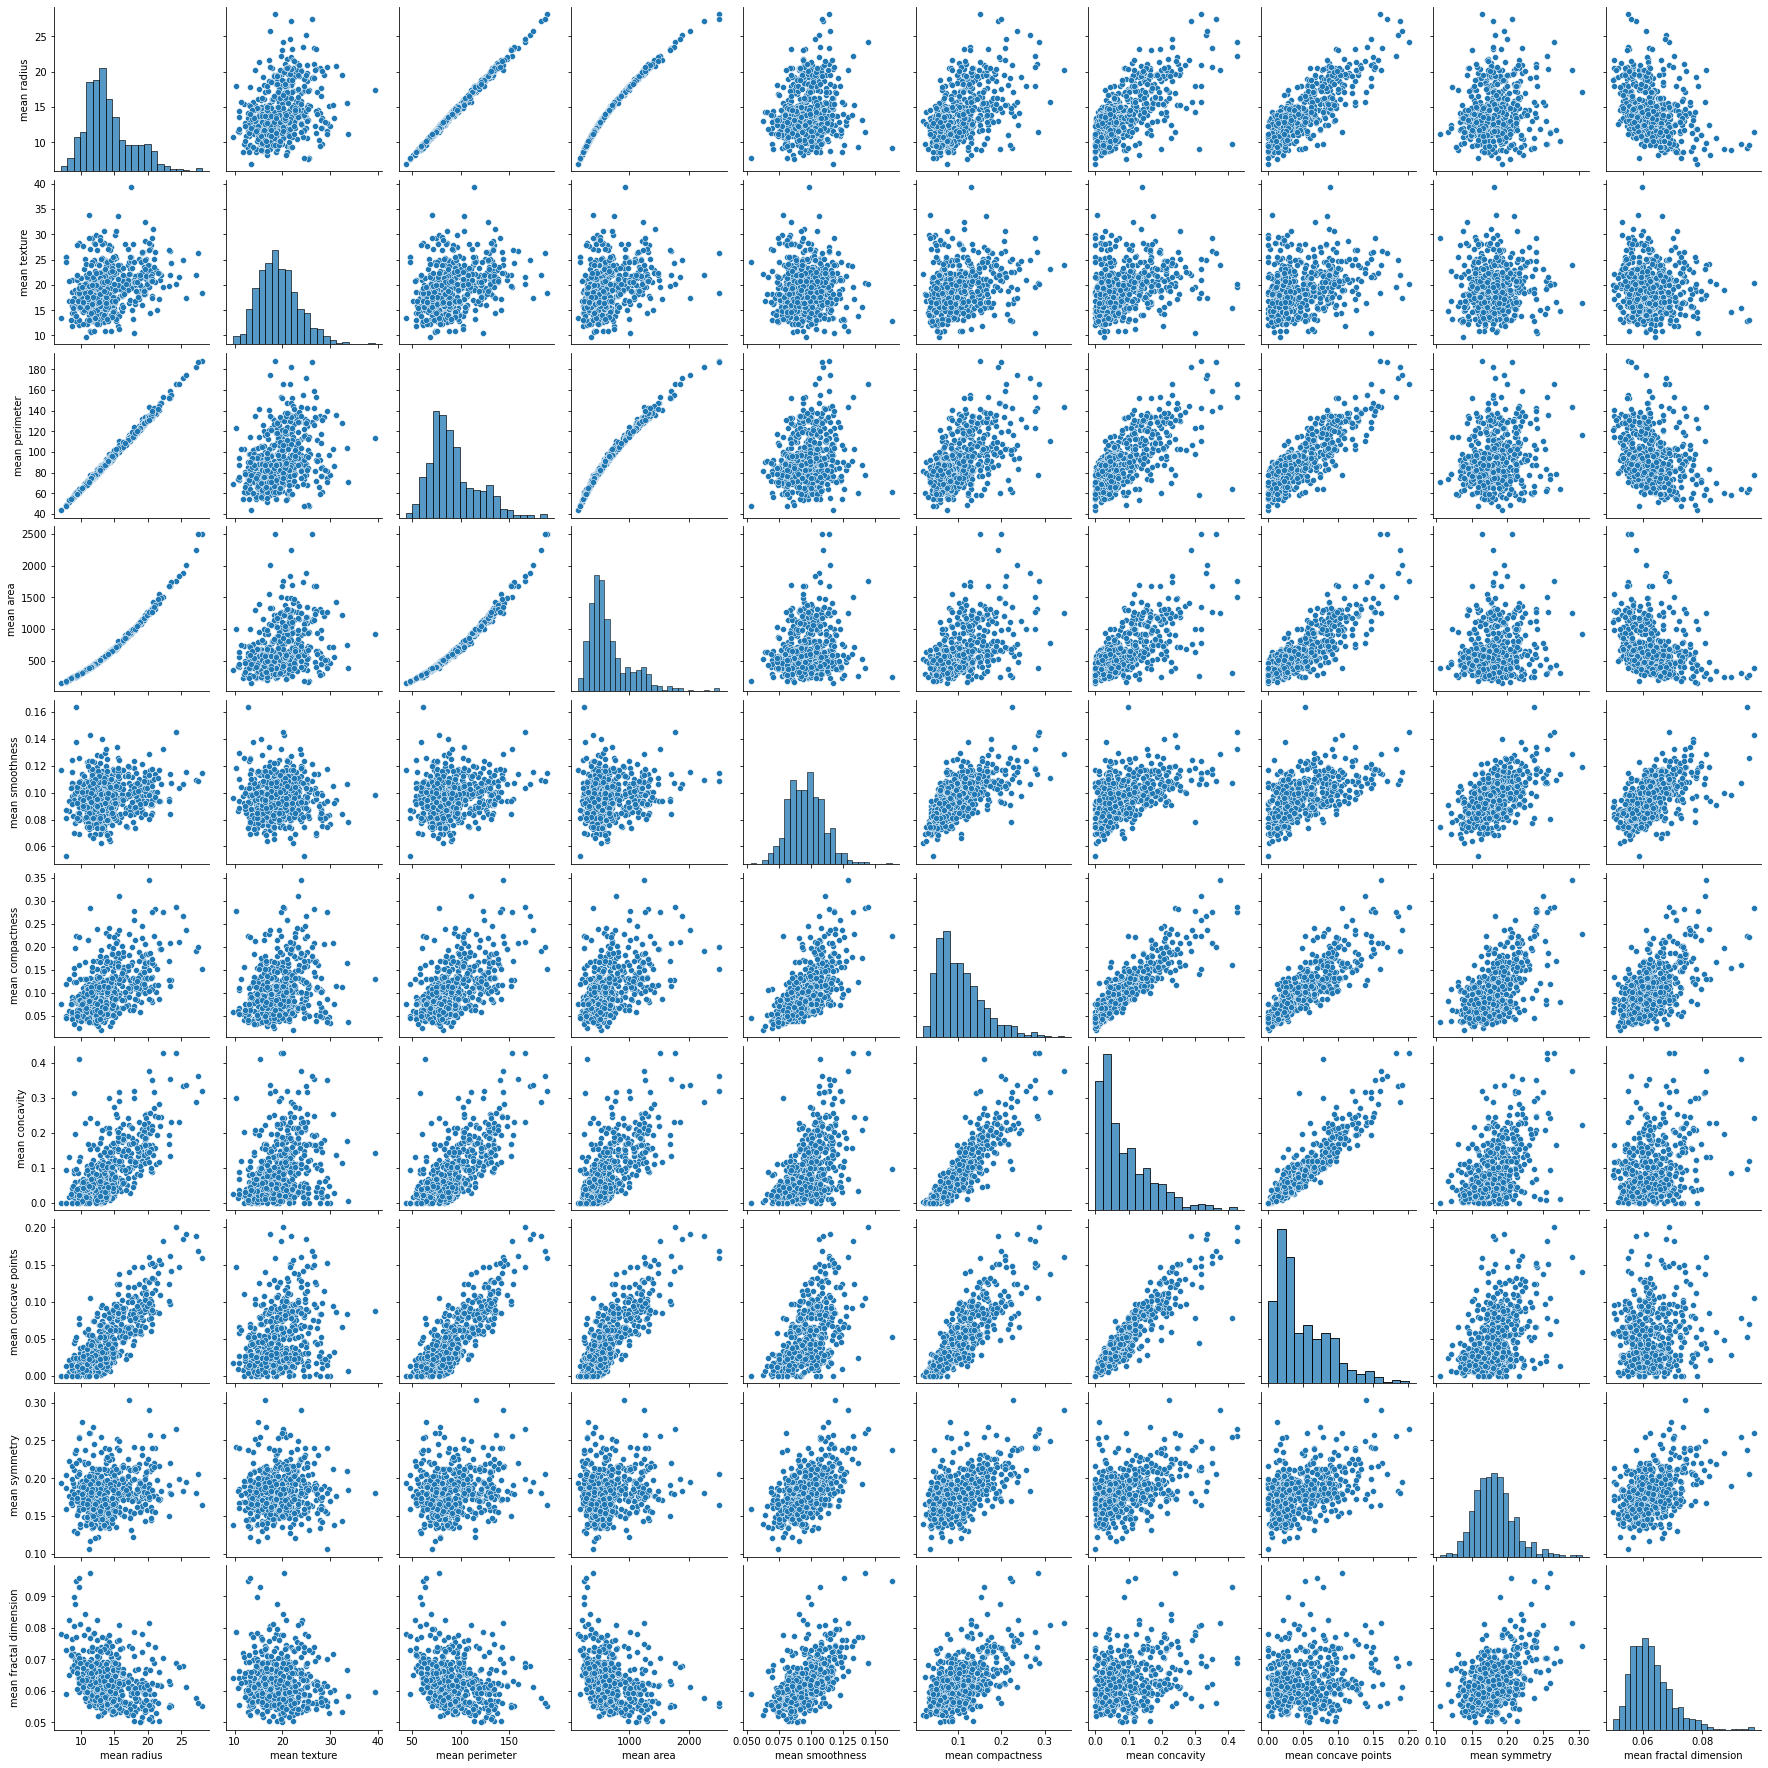

In [228]:
sns.pairplot(df_cancer.iloc[:, 0:10])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> determinad cuáles son las variables con una correlación superior al 90% y cread un nuevo conjunto de datos (dataframe) eliminando estas variables.
</div>

In [229]:
# Las variables con una correlación superior al 90% son:
# - mean radius y mean perimeter.
# - mean radius y mean area.
# - mean perimeter y mean area.
# - mean concavity y mean concave points.
# Por lo tanto, nos vamos a quedar solamente con mean radius y mean concavity. Eliminamos mean perimiter,
# mean area, mean concave points.

df_cancer_clean = df_cancer_disc.drop(["mean perimeter", "mean area", "mean concave points"], axis=1)
df_cancer_clean.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,target,diagnosis
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,0,M
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0,M
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0,M
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0,M
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0,M


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando las correlaciones, ¿qué variables son las que tienen una correlación más fuerte y han sido eliminadas? ¿Qué efecto puede tener en el resultado final el hecho de elminarlas o no?
</div>

La variables con una correlación más fuertes han sido:
- mean radius con mean perimeter.
- mean radius con mean area.
- mean perimeter con mean area.
- mean concavity con mean concave points.

En resumen, el radio, perímetro y área están altamente correlacionadas, por otro lado, la concavidad y puntos cóncavos también.

Se ha decido quedarnos con las variables radius y concavity, es decir:
- Las variables perimeter y area  han sido eliminadas ya que no aportan información al modelo, esto se debe a que dicha información la puede proporcionar el radius.
- La variable concave points ha sido eliminada porque presenta una altísima correlación con otras variables que pertenecen al conjuntos de datos final.

Eliminar las variables correlacionadas no significa que sea un proceso correcto o no, depende de los objetivos analíticos. Cuando eliminamos variables correlacionadas estamos quitando la redundancia de los datos, esto puede ser muy importante ya que por ejemplo si hacemos un análisis de componentes principales, y no hemos eliminado las variables correlacionadas los resultados del ACP pueden ser cambiantes, es decir, si continuamos con la redundancia de los datos el primer componente principal va a adquirir toda la variabilidad de los datos, desechando así la idea de tener otros componentes principales.

Otro de los inconvenientes es que puede haber algoritmos que no funcionen bien cuando los datos están altamente correlacionados, aunque hoy en día la gran mayoría de modelos son capaces de identificar y manejar dichos datos.

Una de las ventajas de eliminar dichas variables es que conseguimos reducir la complejidad del dataset, es decir, al eliminar atributos tenemos menos y ahorramos costes computacionales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Bonus:</strong>
<br> - ¿Qué test estadístico podrías usar para comparar las distribuciones de los valores de los atributos cuando los diagnósticos son benignos o malignos? Úsalo para evaluar qué atributos (de entre todos los del conjunto de datos) tienen valores más parecidos en tumores benignos y malignos. Interpreta el resultado.
    </div>

Para poder hacer este punto debemos hacer uso del estadístico Kolmogorov–Smirnov, éste nos permite comparar dos distribuciones y ver si esa variable se distribuye de la misma forma en dos grupos (benignos y malignos).

Para ello, el estadístico se basa en un contraste de hipótesis, siendo:
- H0 (hipótesis nula): siguen la misma distribución.
- H1 (hipótesis alternativa): hay diferencias significativas en la distribución.

Si el pvalor que nos proporciona el estadístico es menor que el nivel de significancia alfa (0.05), podemos rechazar la hipótesis nula en favor de la alternativa, en caso contrario mantenemos la hipótesis nula.

Lo primero de todo es importar el método estadístico a partir de la librería scipy.stats.

In [230]:
from scipy.stats import ks_2samp # Importación del estadístico

print("\n-------------------------------------------")
print("\tTest de Kolmogorov–Smirnov")
print("-------------------------------------------")

df_test_ks = pd.DataFrame(index = ["pvalue"])

for col in feature_names: # Recorremos todas las columnas menos la objetivo
    statistic, pvalue = ks_2samp(df_benigno[col], df_maligno[col])
    df_test_ks[col] = [pvalue]
    
df_test_ks


-------------------------------------------
	Test de Kolmogorov–Smirnov
-------------------------------------------


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
pvalue,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,1.643130e-14,2.220446e-16,2.220446e-16,2.220446e-16,8.595014e-12,0.019038


Si observamos la ejecución anterior vemos que todas las variables tienen un pvalor < alfa (0.05), por lo que podemos rechazar la hipótesis nula en favor de la alternativa, es decir, sí que hay una diferencia significativa entre las muestras de benignos y malignos para cada una de las variables.

# 3. Reducción de dimensionalidad (3 puntos)

En este ejercicio deberéis aplicar métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> aplicad el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones:
<br>- El conjunto de datos original
<br>- El conjunto de datos al cual se le han extraído las variables fuertemente correlacionadas

NOTA: Tened cuidado y no incluyáis la variable objetivo "Diagnosis" a la reducción de dimensionalidad. Queremos poder explicar la variable objetivo en funcion del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis los algoritmos, podéis hacer uso de las implementaciones disponibles en la librería "scikit-learn".
</div>

In [231]:
# https://pharos.sh/implementacion-de-pca-en-python-con-scikit-learn/
# https://www.aprendemachinelearning.com/comprende-principal-component-analysis/
# https://www.cienciadedatos.net/documentos/py19-pca-python.html

# PCA DEL CONJUNTOS DE DATOS ORIGINAL
df_vInd_original = df_cancer.iloc[:, 0:10]
# Normalizamos los datos, ya que al estar en diferentes unidades de medida reducimos las diferentes
# varianzas y no creamos un ACP sesgado
sc_dfOriginal = StandardScaler()
X_dfOriginal_escalado = sc_dfOriginal.fit_transform(df_vInd_original)
# Generamos el PCA
pca_dfOriginal = PCA(n_components=2) # 2 porque se indica en el enunciado del ejercicio
X_pca_dfOriginal = pca_dfOriginal.fit_transform(X_dfOriginal_escalado)


# PCA DEL CONJUNTOS DE DATOS SIN LAS VARIABLES FUERTEMENTE CORRELACIONADAS
df_vInd_clean = df_cancer_clean.iloc[:, 0:7]
# Normalizamos
sc_dfClean = StandardScaler()
X_dfClean_escalado = sc_dfClean.fit_transform(df_vInd_clean)
# Generamos el PCA
pca_dfClean = PCA(n_components=2)
X_pca_dfClean = pca_dfClean.fit_transform(X_dfClean_escalado)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> generad un gráfico (en 2D) con el resultado del PCA usando colores diferentes para cada clase de la respuesta, con el objetivo de visualizar si es posible separar eficientemente las clases empleando este método.</div>

In [232]:
# Definimos el método que nos va a permitir generar los gráficos para los dos casos
# Basado en https://www.aprendemachinelearning.com/comprende-principal-component-analysis/
def rd_chart(X, df, target):
    Xax = X[:,0]
    Yax = X[:,1]
    labels = df[target].values
    cdict = {"B":'green', "M":'red'}
    labl = {"B":'Benigno', "M":'Maligno'}
    #     marker={0:'*',1:'o'}
    alpha = {"B":.3, "M":.5}
    fig, ax = plt.subplots(figsize=(7,5))
    fig.patch.set_facecolor('white')

    for l in np.unique(labels):
        ix = np.where(labels == l)
        ax.scatter(Xax[ix], Yax[ix], c=cdict[l], label=labl[l], alpha=alpha[l])
    #         ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

    plt.xlabel("Primer componente principal",fontsize=14)
    plt.ylabel("Segundo componente principal",fontsize=14)
    plt.title("Análisis de componente principales", fontsize=14)
    plt.legend()
    plt.show()

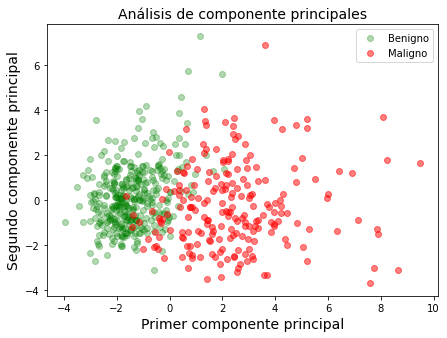

In [233]:
rd_chart(X_pca_dfOriginal, df_cancer_disc, "diagnosis")

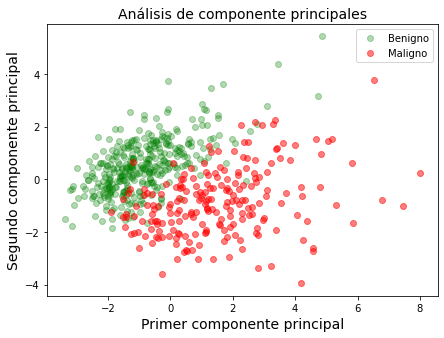

In [234]:
rd_chart(X_pca_dfClean, df_cancer_disc, "diagnosis")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comenta el resultado.</div>

El primer gráfico se corresponde con el dataframe de todos los datos, mientras que el segundo no contiene los atributos fuertemente correlacionados.

Como era de esperar hemos obtenido dos gráficos diferentes, en el primero podemos observar que no hay una clara separación de las clases, es decir, hay puntos que deberían a priori pertencer a una determinada clase y realmente pertenecen a la contraria. Esta apreciación sucede menos en el segundo gráfico, ya que éste no contiene variables correlacionadas, esto significa que no hay redundancia en los datos y no damos prioridad al conjunto de variables correlacionadas, como resultado obtenemos un mejor ACP ya que las clases están mejor diferenciadas.

En resumen, como era de esperar al usar un conjunto de datos que no contiene variables correlacionadas obtenemos un mejor ACP, ya que conseguimos eliminar esa redundancia en los datos tal y como se explicó en el ejercicio 2.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿qué otro método o métodos de reducción de dimensionalidad se podrían aplicar?</div>

Para reducir la dimensionalidad del dataset podríamos usar dos métodos más:

- Descomposición en valores singulares (SVD): su objetivo es descomponer una matriz como la suma ponderada de los vectores propios.
- Factorización de matrices no negativas (NMF): su factorización se basa en que todos los elementos de la matriz son números no negativos y su objetivo es encontrar un par de matrices no negativas que cuyo producto se asemeje a la matriz no negativa original.

El método elegido para hacer el siguiente ejercicio es la factorización de matrices no negativas (NMF). La elección viene determinada porque dicho método se encuentra dentro de la librería sklearn (la misma que para el ACP). 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> elige un método de reducción y genera el gráfico (2D) con el resultado.</div>

In [235]:
# NMF DEL CONJUNTOS DE DATOS ORIGINAL
# Normalizamos los datos, ya que al estar en diferentes unidades de medida reducimos las diferentes
# varianzas y no creamos un modelo sesgado. En este caso usamos MinMax, ya que el modelo no puede tener
# valores negativos
mMs_dfOriginal = MinMaxScaler()
X_dfOriginal_escalado_mM = mMs_dfOriginal.fit_transform(df_vInd_original)
# Generamos el NMF
nmf_dfOriginal = NMF(n_components=2, init="nndsvda") # 2 porque se indica en el enunciado del ejercicio
X_nmf_dfOriginal = nmf_dfOriginal.fit_transform(X_dfOriginal_escalado_mM)

# NMF DEL CONJUNTOS DE DATOS SIN LAS VARIABLES FUERTEMENTE CORRELACIONADAS
# Normalizamos
mMs_dfClean = MinMaxScaler()
X_dfClean_escalado_mM = mMs_dfClean.fit_transform(df_vInd_clean)
# Generamos el NMF
nmf_dfClean = NMF(n_components=2, init="nndsvda")
X_nmf_dfClean = nmf_dfClean.fit_transform(X_dfClean_escalado_mM)

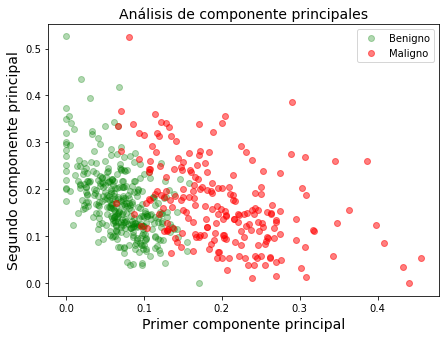

In [236]:
rd_chart(X_nmf_dfOriginal, df_cancer_disc, "diagnosis")

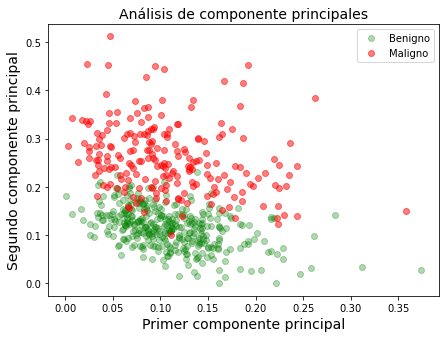

In [237]:
rd_chart(X_nmf_dfClean, df_cancer_disc, "diagnosis")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> en comparación con el PCA, ¿qué método ha resultado más efectivo para visualizar las dos clases de diagnóstico de forma separada? ¿Cuándo es más apropriado usar PCA o el otro método elegido?</div>

A la vista de los gráficos obtenidos es complicado ver qué modelo se comporta mejor si el PCA o el NMF, en línea generales creo que el PCA se comporta un poco mejor, debido a que consigue separar un pelín mejor ambas clases tanto si hay correlacioneso no, es decir, en el caso de que el tumor sea benigno consigue que los datos estén más juntos (no haya tanta dispersión) y se mezclan algo menos estos datos con los casos en los que el tumor sea maligno. Pero esto es solo una apreciación humana, habría que probar un modelo de clasificación para saber cuál funciona mejor.

Cabe destacar que si los datos usados son los que tienen correlaciones se comporta a priori un poco mejor el modelo NMF, pero en cambio si hacemos uso del dataset sin correlaciones el modelo PCA parece que funciona mejor (hace una mejor separación de clases).

En resumen, es díficil apreciar cuál se comporta mejor en líneas generales, lo ideal sería probar los dataset obtenidos con un clasificador, y ver con cual obtenemos un mayor rendimiento.

Tanto PCA como NMF son técnicas de reducción de la dimensionalidad muy parecidas, la diferencia es que PCA permite que la matriz sea negativa mientras que NMF no lo permite, por lo tanto el resultado que obtenemos con ambas técnicas es similar. Otro punto a destacar es que en PCA los componentes aprenden secuancialmente, mientras que en NMF los componentes aprenden al mismo tiempo.

Investigando por internet he visto que cuando los dataset son de imágenes suele funcionar mejor NMF, mientras que PCA en ese caso se comporta un poco peor. Sin embargo, cuando el dataset es numérico ambos ofrecen una calidad de reducción de dimensionalidad parecida. Sinceramente, no creo que haya un método mejor que otro, sino que la prueba y error va a ser los que nos determine qué técnica funciona mejor para nuestro dataset.

# 4. Entrenamiento y test (3 puntos)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el clasificador Decision Tree (un árbol de decisión), para predecir el diagnóstico de cáncer de mama (tumor benigno o maligno) y evaluar la precisión obtenida con el modelo. Para ello usaremos:
- El conjunto de datos original con todos los atributos
- El conjunto de datos reducido a sólo 2 atributos con PCA
- El conjunto de datos sin las variables fuertemente correlacionada y reducido a sólo 2 atributos con el método PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando el conjunto de datos original:

 - Dividid el dataset en train y test.
 - Definid un modelo Decision Tree (fijando max_depth = 5 para mantener el modelo simple).
 - Aplicad validación cruzada con el modelo definido y el dataset de train (con cv=5 ya es suficiente).
 - Calculad la media y la desviación estándar de la validación cruzada.
    
<hr>
Sugerencia: Para separar entre train y test podéis usar train_test_split de sklearn.

Sugerencia: Para entrenar un modelo decision tree podéis usar 'DecisionTreeClassifier' de sklearn.

Sugerencia: Para aplicar validación cruzada podéis usar 'cross_val_score' de sklearn.
</div>

In [238]:
# ELIMINAMOS la variable target porque ya tenemos diagnosis y es más fácil hacer uso de esta para la 
# visualización
df_cancer_ej4 = df_cancer.drop("target", axis=1)

# DIVIDIMOS el dataset en train y test
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    df_cancer_ej4.iloc[:, 0:10],
    df_cancer_ej4["diagnosis"],
    random_state=0)

# DEFINIMOS el clasificador
model_dtc_original = DecisionTreeClassifier(max_depth=5, 
                                            random_state=0)

# VALIDACIÓN CRUZADA con el dataset de train
cvscores_original = cross_val_score(model_dtc_original, 
                                    X_train_original, 
                                    y_train_original, 
                                    cv=5, 
                                    scoring="accuracy")

# MEDIA y DESVIACIÓN
print("La media de cross_validation: ", cvscores_original.mean())
print("La desviación estándar de cross_validation: ", cvscores_original.std())

La media de cross_validation:  0.9083994528043776
La desviación estándar de cross_validation:  0.022966837405570546


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> haced el fit con todo el conjunto de train, y generad el árbol de decisión correspondiente.
    
<hr>
Sugerencia: para dibujar árboles de decisión, echad un ojo a este link:

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

</div>

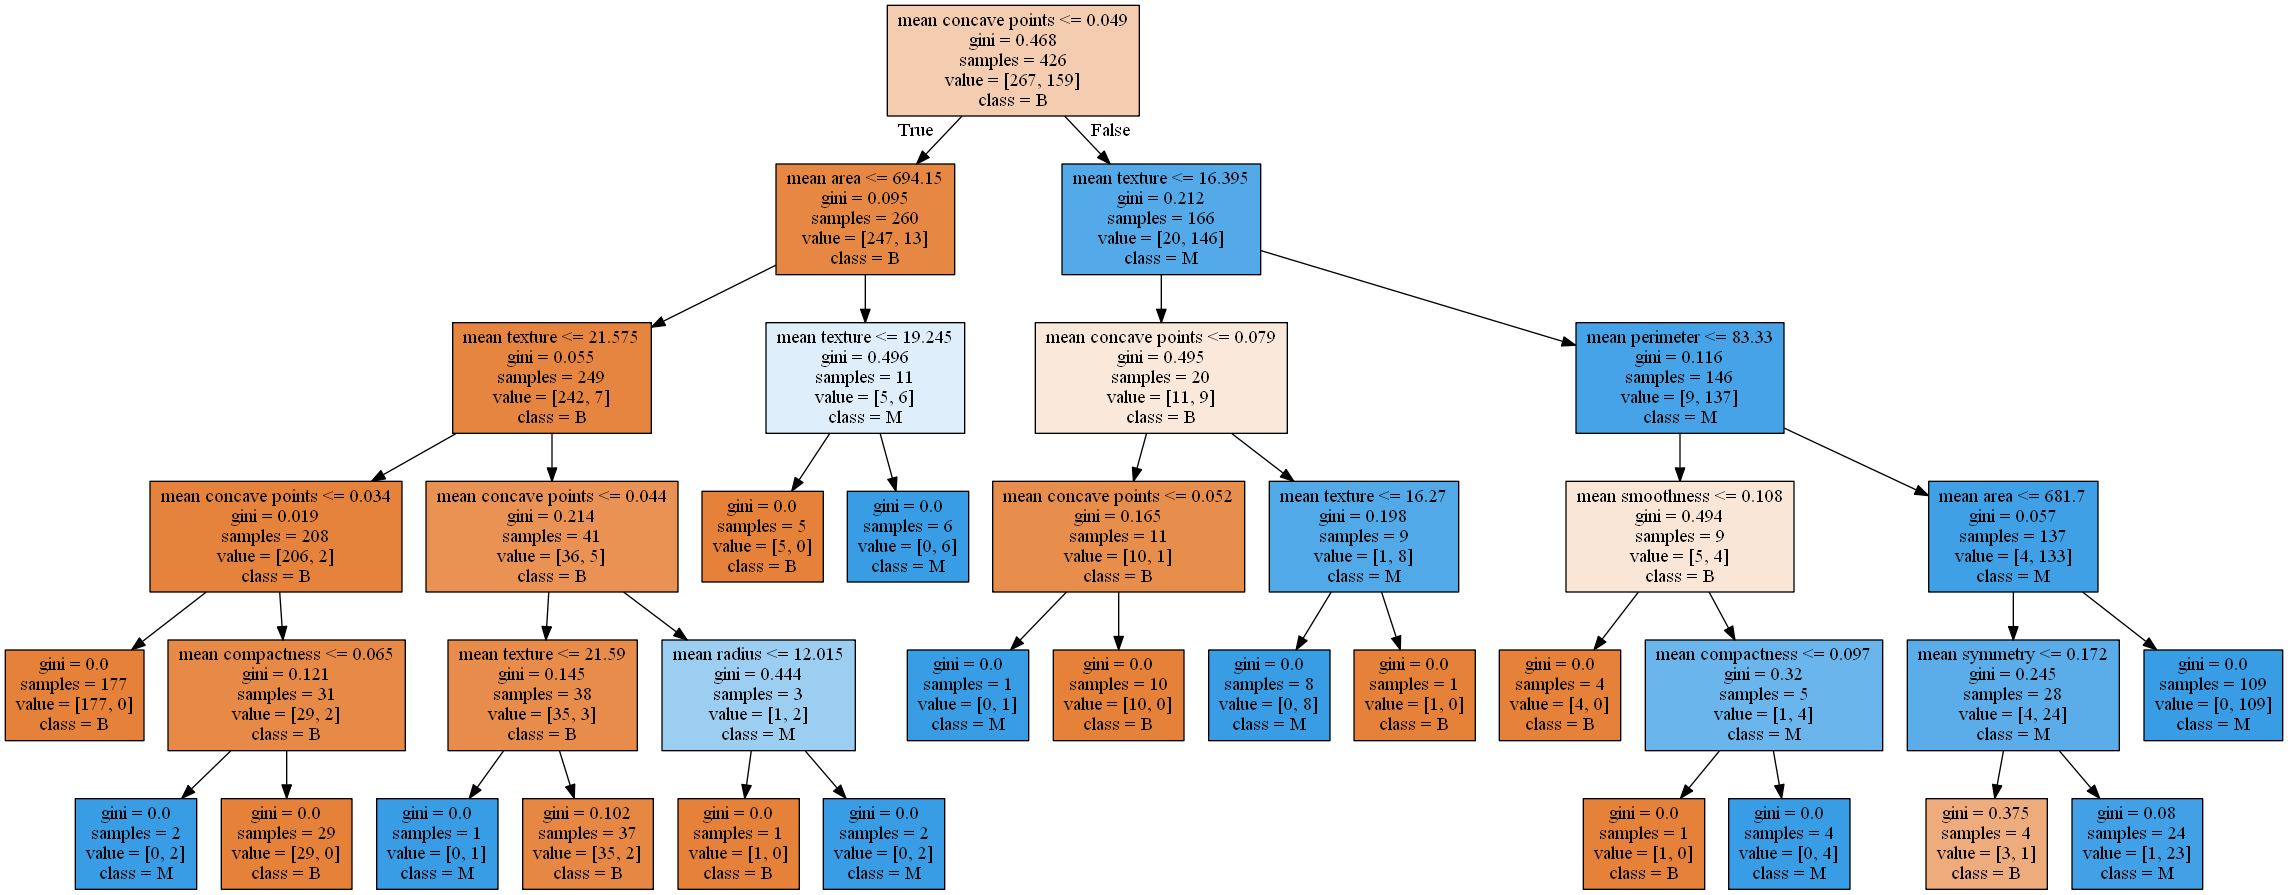

In [269]:
# AJUSTAMOS los datos
model_dtc_original.fit(X_train_original, y_train_original)

# ÁRBOL
tree.export_graphviz(model_dtc_original,
                    out_file="tree_original.dot",
                    feature_names=df_cancer_ej4.columns[0:10],
                    class_names=np.unique(df_cancer_ej4["diagnosis"].values),
                    filled=True)

display(Image(filename='tree_original.png'))

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> repetid el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con PCA.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> repetid el mismo procedimiento que en el ejercicio anterior con el conjunto de datos sin las variables fuertemente correlacionada y reducido a sólo 2 atributos con el método PCA.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿con qué datos ha funcionado mejor? ¿Tiene sentido? ¿Cuadra con los resultados que hemos visto en el ejercicio 3?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> con el mejor modelo que hayáis obtenido:
    
 - Generad predicciones sobre el dataset de test.
 - Calculad la precisión de las predicciones obtenidas y la matriz de confusión asociada.
 
<hr>
Sugerencia: para calcular la precisión y la matriz de confusión podéis usar las funciones dentro del módulo "metrics" de sklearn.
</div>